### Import Libraires

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

In [2]:
#reading files
resumeData = pd.read_csv(r'./ResumeData/Resume.csv', index_col = 0)

print(resumeData.columns)
resumeData.shape

Index(['Resume_str', 'Resume_html', 'Category'], dtype='object')


(2484, 3)

### Data visualization

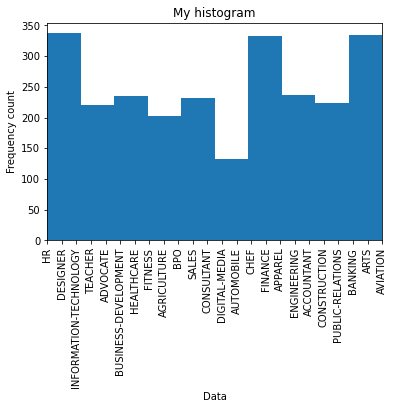

In [3]:
#Histogram
plt.xticks(rotation = 90)
plt.xlim([0, 23])
plt.hist(resumeData['Category'])
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('My histogram')
plt.show()

### Dropping Rows/Columns

In [4]:
#Drop null rows
resumeData = resumeData.dropna()

columnDrop = ['Resume_html']

resumeData.drop(columnDrop, axis=1, inplace=True)

resumeData


,Resume_str,Category
ID,,
16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR
33176873,HR DIRECTOR Summary Over 2...,HR
27018550,HR SPECIALIST Summary Dedica...,HR
17812897,HR MANAGER Skill Highlights ...,HR
...,...,...
99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
31605080,GEEK SQUAD AGENT Professional...,AVIATION


### Combing Job Categories

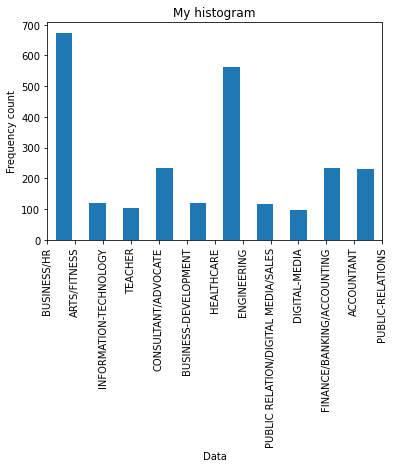

In [5]:
#Combining Categories to reduce number of classes
resumeData['Category'] = resumeData['Category'].replace(['FINANCE','BANKING', 'ACCOUNTING'],'FINANCE/BANKING/ACCOUNTING')
resumeData['Category'] = resumeData['Category'].replace(['ARTS','DESIGNER', 'APPAREL','FITNESS', 'CHEF'],'ARTS/FITNESS')
resumeData['Category'] = resumeData['Category'].replace(['BUSINESS DEVELOPMENT','HR', 'BPO'],'BUSINESS/HR')
resumeData['Category'] = resumeData['Category'].replace(['AUTOMOBILE','ENGINEERING', 'CONSTRUCTION', 'AVIATION', 'AGRICULTURE'],'ENGINEERING')
resumeData['Category'] = resumeData['Category'].replace(['PUBLIC RELATION','DIGITAL MEDIA', 'SALES'],'PUBLIC RELATION/DIGITAL MEDIA/SALES')
resumeData['Category'] = resumeData['Category'].replace(['CONSULTANT','ADVOCATE'],'CONSULTANT/ADVOCATE')


#New Histogram
plt.xticks(rotation = 90)
plt.xlim([0, 12])
plt.hist(resumeData['Category'],
         rwidth = 0.5)
plt.ylabel('Frequency count')
plt.xlabel('Data');
plt.title('My histogram')
plt.show()

### Stemmer

In [6]:
#initialize objs
stemmer = SnowballStemmer("english")
stop = stopwords.words('english')

def stemStopResume(df):
    #remove excess symbols
    df = df.replace(r'[^\w\s]|_', '', regex=True)
    
    #remove stopwords
    df['stopColumn'] = df['Resume_str'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #split and stem column
    df['stopColumn'] = df['stopColumn'].str.split()
    df['stopColumn'] = df['stopColumn'].apply(lambda x: ' '.join([stemmer.stem(y) for y in x]))
    
    #return modified df
    return df

resumeData = stemStopResume(resumeData)
resumeData

,Resume_str,Category,stopColumn
ID,,,
16852973,HR ADMINISTRATORMARKETING ASSOCIATE\n...,BUSINESSHR,hr administratormarket associ hr administr sum...
22323967,HR SPECIALIST US HR OPERATIONS ...,BUSINESSHR,hr specialist us hr oper summari versatil medi...
33176873,HR DIRECTOR Summary Over 2...,BUSINESSHR,hr director summari over 20 year experi recrui...
27018550,HR SPECIALIST Summary Dedica...,BUSINESSHR,hr specialist summari dedic driven dynam 20 ye...
17812897,HR MANAGER Skill Highlights ...,BUSINESSHR,hr manag skill highlight hr skill hr depart st...
...,...,...,...
99416532,RANK SGTE5 NON COMMISSIONED OFFICER I...,ENGINEERING,rank sgte5 non commiss offic in charg brigad m...
24589765,GOVERNMENT RELATIONS COMMUNICATIONS A...,ENGINEERING,govern relat communic and organiz develop dire...
31605080,GEEK SQUAD AGENT Professional...,ENGINEERING,geek squad agent profession profil it support ...


### Vectorization

In [7]:
def resume_vectorizer(data, m = 1.0 , n = 2) :
    """
    # vectorizing the lables i.e To numerical values using label_encoder
    label_encoder = preprocessing.LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    """
    # Now vectorizing the data i.e. Creating features based on data
    cv = CountVectorizer(max_df = m , min_df = n )
    data_cv = cv.fit_transform(data)
    data_cv_array = data_cv.toarray()
    
    feature_names =cv.get_feature_names_out()
    print('Feature Count: ', len(feature_names))
    
    dataframe = pd.DataFrame(data_cv_array, columns = feature_names)

    return dataframe #, labels

vectorDataFrame = resume_vectorizer(resumeData['stopColumn'])

print(vectorDataFrame.columns)
vectorDataFrame

Feature Count:  15599
Index(['00', '000', '003', '01', '011977', '011979', '011980', '011981',
       '011982', '011983',
       ...
       'zoho', 'zonal', 'zone', 'zoo', 'zoom', 'zooshelp', 'zos', 'zumba',
       'zynx', 'zyrtec'],
      dtype='object', length=15599)


,00,000,003,01,011977,011979,011980,011981,011982,011983,...,zoho,zonal,zone,zoo,zoom,zooshelp,zos,zumba,zynx,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Models